In [1]:
import numpy as np
import pandas as pd
import pickle

from glob import glob
from PIL import Image
import cv2

In [2]:
saved_model = pickle.load(open('fruit_industry_model.pickle', 'rb'))

In [3]:
clf = saved_model[0]
scaler = saved_model[1]

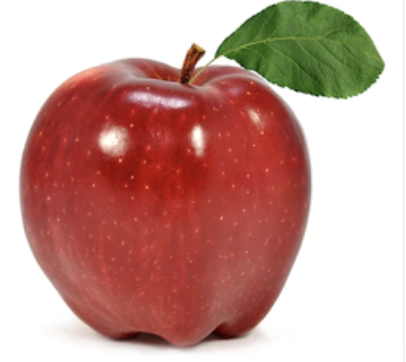

In [4]:
img_path = glob('dataset/freshapples/*')[1]
incoming_data = Image.open(img_path)

incoming_data

In [5]:
incoming_data = incoming_data.resize([32, 32])
incoming_data = np.array(incoming_data)

if incoming_data.shape[2] == 4:
    incoming_data = cv2.cvtColor(incoming_data, cv2.COLOR_BGRA2BGR)
    
incoming_data = incoming_data.reshape(1, -1)
incoming_data = scaler.transform(incoming_data)

incoming_data

array([[1.        , 1.        , 1.        , ..., 0.99215686, 0.99215686,
        0.99215686]])

# Prediction

In [6]:
predicted_target = clf.predict(incoming_data)

In [7]:
predicted_target

array(['freshapples'], dtype='<U32')